# Experiment 8

This experiment investigates the convergence rates of $E_{\mu_n}[R(\hat q)]$ compared to
constant $R(q^\star)$, using constant $p=6$.

Not sure what we expect as the convergence rate.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cvxpy as cvx
from model.distrs import StudentTDistribution,DiscreteDistribution,NormalDistribution
from model.distrs import E,Var,Std
import model.synth_data as synth
import model.utility as ut
import model.problem as pr

from helper.stats import five_stats

In [26]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10,4)
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['savefig.dpi'] = 100
plt.rc('text',usetex=True)
plt.rc('font',serif='times')

In [4]:
p = 6
ns = np.arange(50,505,5)
n_true = 50000
n_experiments = 500
λ = 3
δ = 0.2

#Utility
β = 1
r_threshold = 60
u = ut.LinearPlateauUtility(β,r_threshold)

Rf = 0 

In [6]:
print(ns)

[ 50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125 130 135
 140 145 150 155 160 165 170 175 180 185 190 195 200 205 210 215 220 225
 230 235 240 245 250 255 260 265 270 275 280 285 290 295 300 305 310 315
 320 325 330 335 340 345 350 355 360 365 370 375 380 385 390 395 400 405
 410 415 420 425 430 435 440 445 450 455 460 465 470 475 480 485 490 495
 500]


In [9]:
# True market
R_true = NormalDistribution(8,10)
X_true = [1/np.sqrt(2)*StudentTDistribution(ν=4) for _ in range(p)]
M_true = synth.GaussianMarket(X_true,R_true)

# Discretized market
X,R = M_true.sample(n_true)
M = synth.MarketDiscreteDistribution(X,R)

In [10]:
# Real q∗ value computation
p_star = pr.Problem(X,R,λ=0,u=u)
p_star.solve()
q_star = p_star.q

In [11]:
R_star_q_star = p_star.insample_cost(q_star)
CE_star_q_star = p_star.insample_CE(q_star)

In [13]:
# Results placeholder
qs = np.zeros(shape=(len(ns),p+1,n_experiments))
CEs_ins = np.empty(shape=(len(ns),n_experiments))
CEs_oos = np.empty(shape=(len(ns),n_experiments))
Rs_ins = np.empty(shape=(len(ns),n_experiments))
Rs_oos = np.empty(shape=(len(ns),n_experiments))

In [0]:
# About 8minutes running time.
for i,n in enumerate(ns):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ,u,Rf)
    prs.sample(n_experiments)
    qs[i,:p+1,:] = prs.qs.T
    CEs_ins[i,:] = prs.CEs_ins
    CEs_oos[i,:] = prs.CEs_oos
    Rs_ins[i,:] = prs.Rs_ins
    Rs_oos[i,:] = prs.Rs_oos

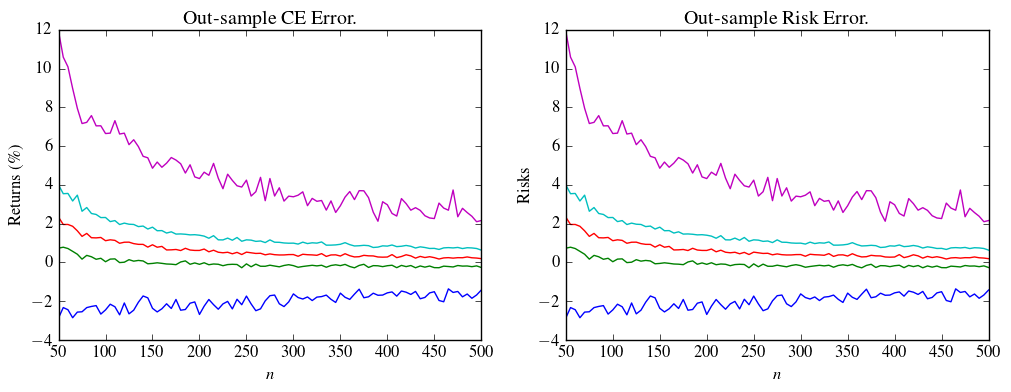

In [42]:
f,(p1,p2) = plt.subplots(1,2)
p1.plot(*five_stats(CEs_ins-CEs_oos,ns))
p1.set_xlabel('$n$')
p1.set_ylabel('Returns (\%)')
p1.set_title('Out-sample CE Error.');

p2.plot(*five_stats(-Rs_ins+Rs_oos,ns))
p2.set_xlabel('$n$')
p2.set_ylabel('Risks')
p2.set_title('Out-sample Risk Error.');

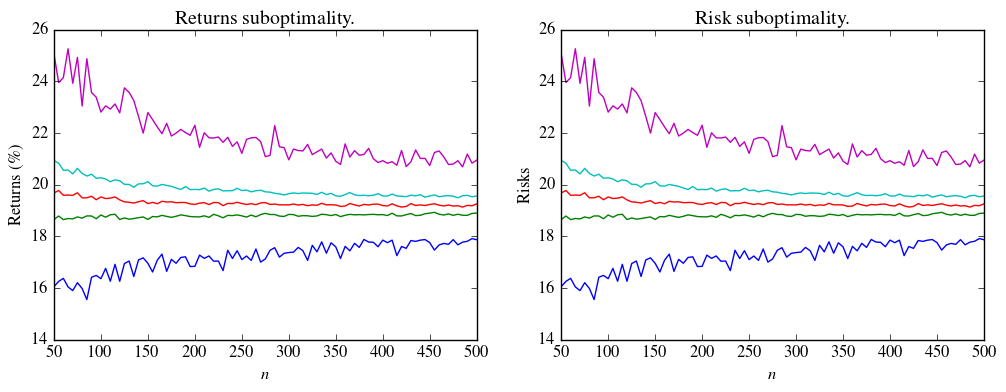

In [44]:
f,(p1,p2) = plt.subplots(1,2)
p1.plot(*five_stats(-CEs_oos+CE_star_q_star,ns))
p1.set_xlabel('$n$')
p1.set_ylabel('Returns (\%)')
p1.set_title('Returns suboptimality.');

p2.plot(*five_stats(-R_star_q_star+Rs_oos,ns))
p2.set_xlabel('$n$')
p2.set_ylabel('Risks')
p2.set_title('Risk suboptimality.');

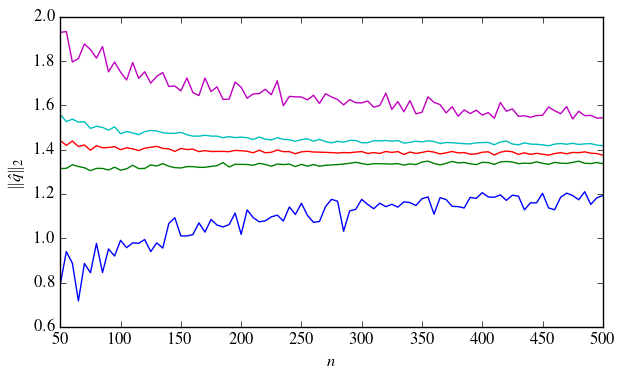

In [49]:
matplotlib.rcParams['figure.figsize'] = (7,4)
norm = np.linalg.norm
plt.plot(*five_stats(norm(qs,axis=1),ns))
plt.xlabel('$n$')
plt.ylabel('$\|\hat q\|_2$');